In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data_badminton.csv")

In [3]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [4]:
df.shape

(8518, 8)

In [5]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        0
Ratings            0
dtype: int64

In [8]:
df[df.duplicated()]

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings


In [9]:
df['Review text']

0       Nice product, good quality, but price is now r...
1       They didn't supplied Yonex Mavis 350. Outside ...
2       Worst product. Damaged shuttlecocks packed in ...
5       Good quality product. Delivered on time.READ MORE
6       BEST PURCHASE It is a good quality and is more...
                              ...                        
8495    Thanks to the delivery boy ... Service is alwa...
8496    Over priced even after 50% discount price is m...
8497    Too much priced. It was getting me for Rs. 640...
8499    Hii flipkart customers care..why your delivery...
8507                         Nice delivery speedREAD MORE
Name: Review text, Length: 8013, dtype: object

In [10]:
df['Review text'].iloc[0]

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [11]:
df.head(1)

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4


In [12]:
def classify_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    else:
        return 'Negative'
    
df['Sentiment'] = df['Ratings'].apply(classify_sentiment)

In [13]:
df['Sentiment'] = df.Sentiment.map({'Positive':1, 'Negative':0})

In [14]:
df.head(1)

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,1


In [15]:
para=' '.join(df['Review text'])

In [16]:
para

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE They didn\'t supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest....  Sad to hear this.READ MORE Worst product. Damaged shuttlecocks packed in new box. It\'s not a original yonex product. Don\'t buy.flipkart platform is chosen to fraud the buyers.READ MORE Good quality product. Delivered on time.READ MORE BEST PURCHASE It is a good quality and is more durable than any average shuttle. And shipping was goodREAD MORE Good quality original shuttles.READ MORE AwesomeREAD MORE nice original productsREAD MORE This GREEN CAP SHUTTLECOCK is really AWESOME. Quality is BEST and GOOD PACKING.This GREEN CAP SHUTTLECOCK is played at WARM CONDITIONS.Worth for MONEY. Simply LOVED it.....READ MORE Best in class....READ MORE it\'s genuine and price is less than our near by shop

In [17]:
# Distribution on target variable looks non-uniform

df['Sentiment'].value_counts(normalize=True)


1    0.80644
0    0.19356
Name: Sentiment, dtype: float64

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

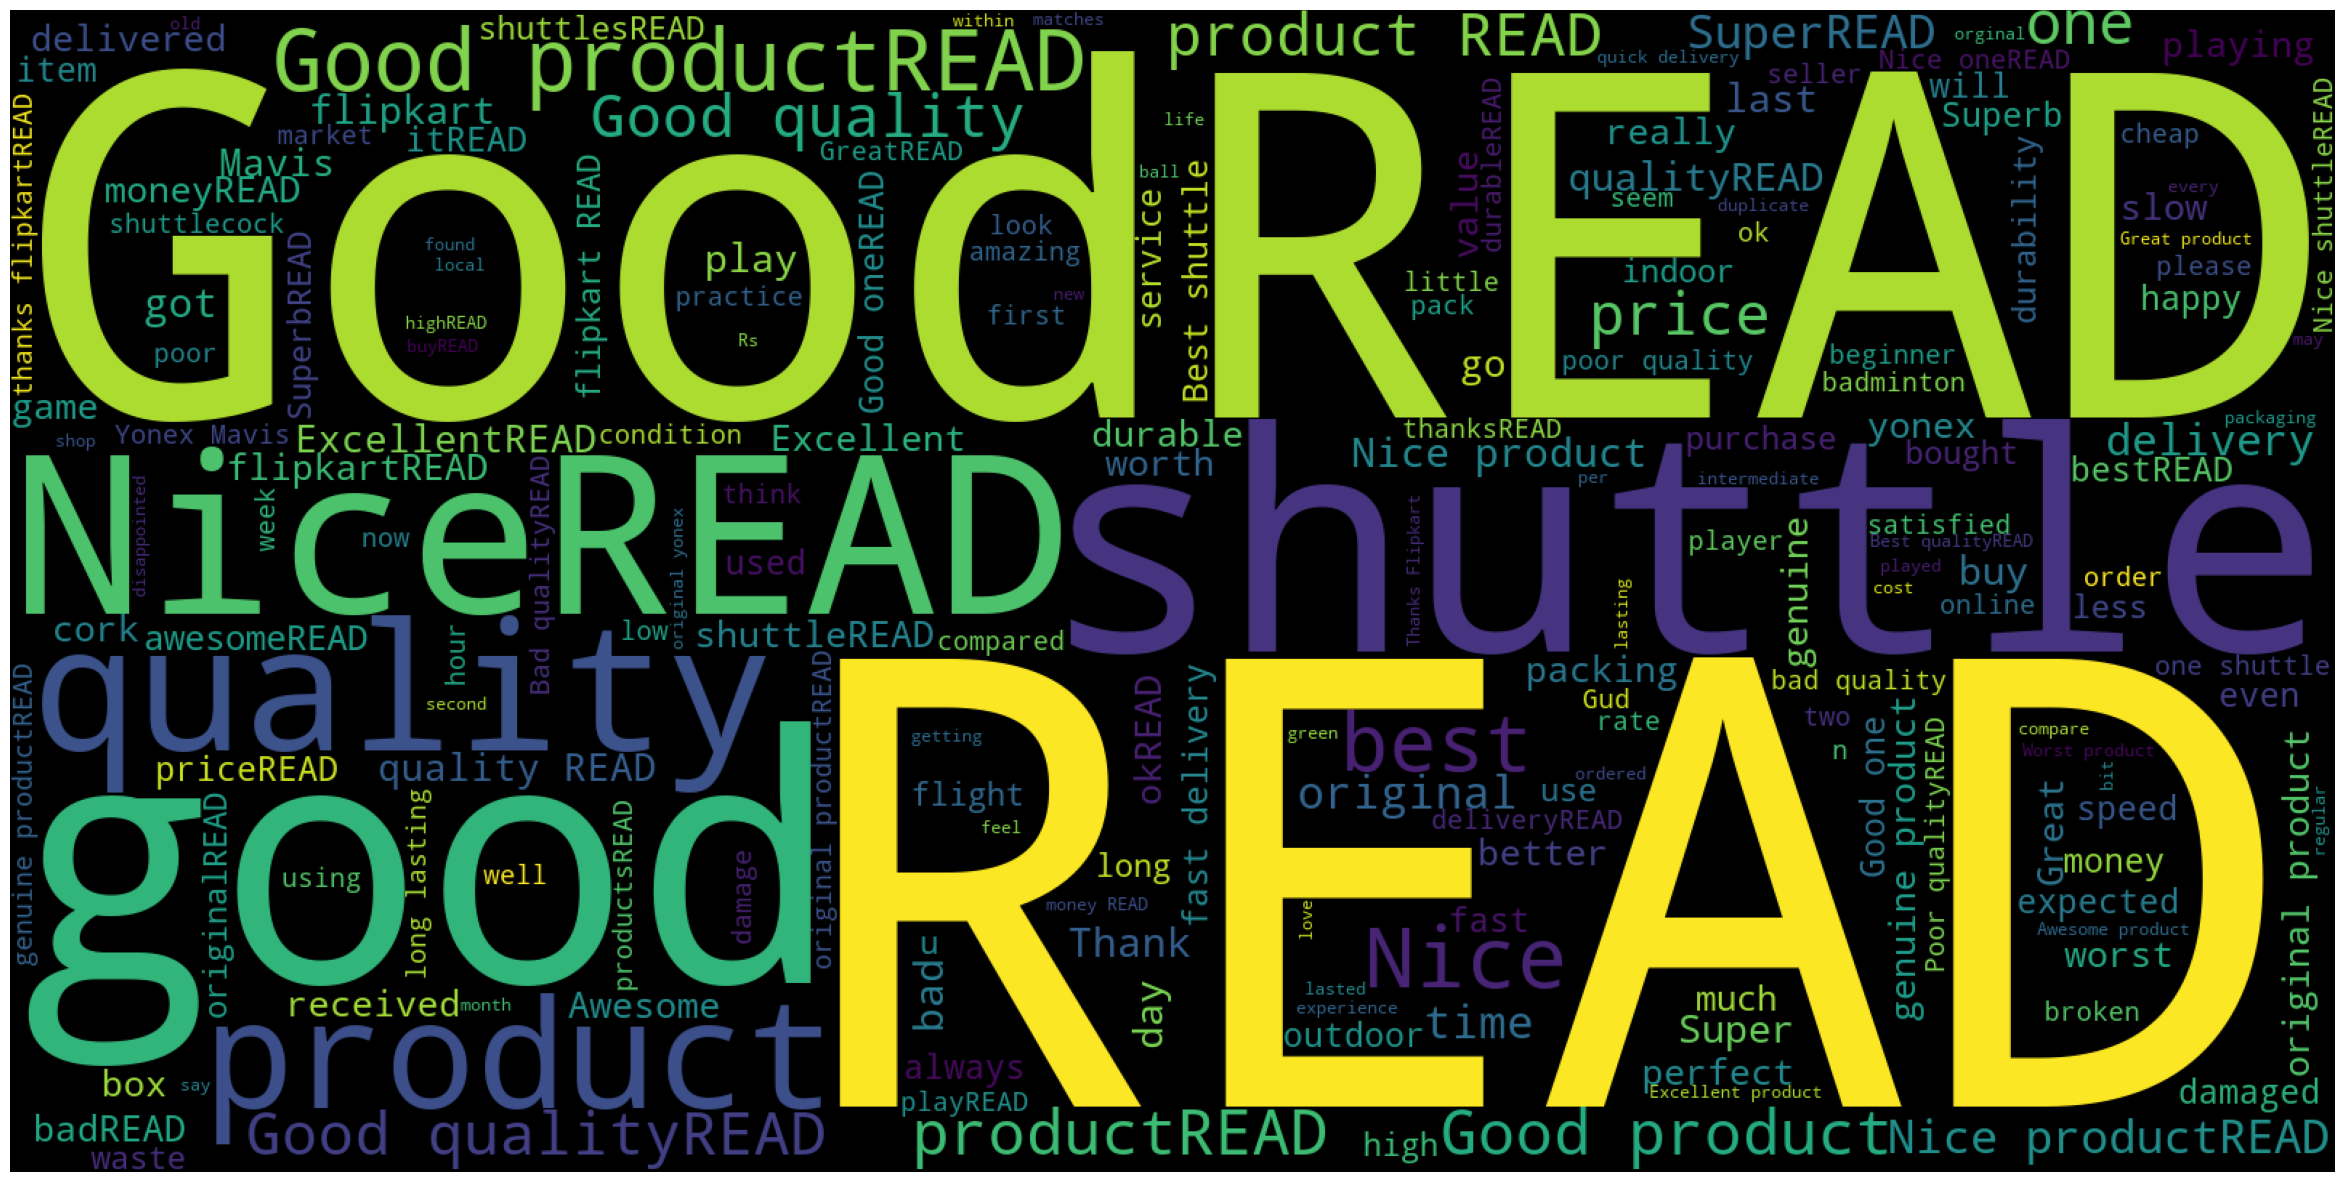

In [19]:
display_wordcloud(df['Review text'])

In [20]:
X=df['Review text']
y=df['Sentiment']

In [21]:
X

0       Nice product, good quality, but price is now r...
1       They didn't supplied Yonex Mavis 350. Outside ...
2       Worst product. Damaged shuttlecocks packed in ...
5       Good quality product. Delivered on time.READ MORE
6       BEST PURCHASE It is a good quality and is more...
                              ...                        
8495    Thanks to the delivery boy ... Service is alwa...
8496    Over priced even after 50% discount price is m...
8497    Too much priced. It was getting me for Rs. 640...
8499    Hii flipkart customers care..why your delivery...
8507                         Nice delivery speedREAD MORE
Name: Review text, Length: 8013, dtype: object

In [22]:
y

0       1
1       0
2       0
5       1
6       1
       ..
8495    1
8496    0
8497    0
8499    1
8507    1
Name: Sentiment, Length: 8013, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=25)

In [25]:
X_train

8398                         Very nice ExcellentREAD MORE
7842                                Good productREAD MORE
3802                                        GoodREAD MORE
8347                                      AwsomeREAD MORE
7054                                        niceREAD MORE
                              ...                        
7945                                        GoodREAD MORE
2651                               Super productREAD MORE
7078                                    good oneREAD MORE
778     It's original and it's the best.Go for it with...
5712                               Great qualityREAD MORE
Name: Review text, Length: 6410, dtype: object

In [26]:
X_test

7688                                It's awesomeREAD MORE
866             Good quality shuttles, worth it.READ MORE
2764                                        NiceREAD MORE
5059                           Very good productREAD MORE
5995                                       superREAD MORE
                              ...                        
3032                                        GoodREAD MORE
7983                                        GoodREAD MORE
5328                     good for daily practiceREAD MORE
7344    Shuttle base is very poor, Recent shuttles com...
4126    every purchase rate increased and product quql...
Name: Review text, Length: 1603, dtype: object

In [27]:
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [28]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\FOUZIA
[nltk_data]     KOUSER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\FOUZIA
[nltk_data]     KOUSER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
def preprocess(review):
    # Removing special characters and digits
    review = re.sub("[^a-zA-Z]", " ", review)
    
    # change text to lower case
    review = review.lower()

    # tokenize into words
    review=review.split()
    
    # remove stop words                
    review= [word for word in review if word not in stopwords.words("english")]
    
    # Stemming/Lemmatization
    wl=WordNetLemmatizer()
    review=[wl.lemmatize(word,pos='v') for word in review ]
    review=' '.join(review)
    return review

In [32]:
X_train= X_train.apply(preprocess)

In [33]:
X_train

8398                          nice excellentread
7842                            good productread
3802                                    goodread
8347                                  awsomeread
7054                                    niceread
                          ...                   
7945                                    goodread
2651                           super productread
7078                                good oneread
778     original best go without hesitation read
5712                           great qualityread
Name: Review text, Length: 6410, dtype: object

In [34]:
X_test = X_test.apply(preprocess)


In [35]:
X_test

7688                                          awesomeread
866                       good quality shuttle worth read
2764                                             niceread
5059                                     good productread
5995                                            superread
                              ...                        
3032                                             goodread
7983                                             goodread
5328                              good daily practiceread
7344    shuttle base poor recent shuttle come porous w...
4126    every purchase rate increase product quqlity g...
Name: Review text, Length: 1603, dtype: object

In [36]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_transformed=cv.fit_transform(X_train)



In [37]:
X_train_transformed.shape

(6410, 2385)

In [38]:
cv.vocabulary_

{'nice': 1294,
 'excellentread': 669,
 'good': 843,
 'productread': 1588,
 'goodread': 847,
 'awsomeread': 139,
 'niceread': 1301,
 'original': 1387,
 'product': 1577,
 'great': 861,
 'dealread': 477,
 'quality': 1638,
 'thank': 2097,
 'ekart': 631,
 'courier': 431,
 'boy': 233,
 'flipkart': 772,
 'give': 832,
 'time': 2139,
 'read': 1684,
 'superbread': 2035,
 'okread': 1352,
 'awesome': 132,
 'thing': 2116,
 'shuttle': 1891,
 'genuine': 826,
 'last': 1068,
 'single': 1914,
 'game': 813,
 'unlikely': 2208,
 'yonex': 2375,
 'dissatisfy': 571,
 'slow': 1924,
 'play': 1492,
 'outside': 1410,
 'open': 1372,
 'courtread': 435,
 'reason': 1689,
 'buy': 271,
 'online': 1365,
 'beaucse': 174,
 'price': 1555,
 'mavis': 1191,
 'find': 742,
 'within': 2319,
 'rs': 1773,
 'go': 838,
 'itread': 1038,
 'fast': 718,
 'delevery': 502,
 'item': 1031,
 'check': 323,
 'website': 2292,
 'definitely': 492,
 'lower': 1144,
 'nearby': 1277,
 'shopsread': 1872,
 'ok': 1345,
 'poor': 1520,
 'averageread': 124

In [39]:
y_train

8398    1
7842    1
3802    1
8347    1
7054    1
       ..
7945    1
2651    1
7078    1
778     1
5712    1
Name: Sentiment, Length: 6410, dtype: int64

In [40]:
import time

# Initialize CountVectorizer
cv = CountVectorizer()

# Fit and transform X_train
start_time = time.time()
X_train_num = cv.fit_transform(X_train)
end_time = time.time()
print("Time taken for fitting and transforming X_train:", end_time - start_time)

# Transform X_test
start_time = time.time()
X_test_num = cv.transform(X_test)
end_time = time.time()
print("Time taken for transforming X_test:", end_time - start_time)

Time taken for fitting and transforming X_train: 0.09919285774230957
Time taken for transforming X_test: 0.025032520294189453


In [45]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from joblib import Memory
import joblib
import os

In [46]:
import warnings

warnings.filterwarnings('ignore')

In [48]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer(),TfidfVectorizer()],
            'vectorization__max_features' : [1000, 2000, 3000, 4000, 5000],  
            'vectorization__ngram_range': [(1, 1), (1, 2)],  
            'vectorization__stop_words': [None, 'english'],  
            'classifier__alpha' : [0.1, 0.5, 1.0, 2.0, 5.0] 
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [ 1000,2000, 5000,7000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000,2000, 5000,7000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
CPU times: total: 1min 35s
Wall time: 4min 3s
Score on Test Data:  0.9227306826706677
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 36 s
Wall time: 1min 32s
Score on Test Data:  0.9183976261127597
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 8min 37s
Wall time: 19min 47s
Score on Test Data:  0.9180327868852459


In [49]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization',
                 CountVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('classifier', MultinomialNB())])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=7000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.6,
                                    penalty='elasticnet', solver='saga'))])



In [52]:
if not os.path.exists('best_models'):
    os.makedirs('best_models')
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'best_models/{name}.pkl')
    model = joblib.load(f'best_models/{name}.pkl')
    
    %time y_test_pred = model.predict(X_test)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 15.6 ms
Wall time: 41.7 ms
Test Score (F1) 0.9227306826706677
Model Size: 424198 Bytes
********** decision_tree **********
CPU times: total: 15.6 ms
Wall time: 24.4 ms
Test Score (F1) 0.9183976261127597
Model Size: 58184 Bytes
********** logistic_regression **********
CPU times: total: 31.2 ms
Wall time: 25.1 ms
Test Score (F1) 0.9180327868852459
Model Size: 81097 Bytes


In [53]:
directory = 'best_models'

# Check if the directory exists
if os.path.exists(directory):
    # List the files in the directory
    files = os.listdir(directory)
    if files:
        print("Saved models in 'best_models' directory:")
        for file in files:
            print(file)
    else:
        print("No files found in 'best_models' directory.")
else:
    print("Directory 'best_models' does not exist.")

Saved models in 'best_models' directory:
decision_tree.pkl
logistic_regression.pkl
naive_bayes.pkl


In [54]:
import os

# Directory containing the saved models
directory = 'best_models'

# Get the absolute path of the directory
absolute_path = os.path.abspath(directory)

# Check if the directory exists
if os.path.exists(absolute_path):
    # Print the absolute path
    print(f"The 'best_models' directory is located at: {absolute_path}")
else:
    print("Directory 'best_models' does not exist.")

The 'best_models' directory is located at: C:\Users\FOUZIA KOUSER\best_models
